Regression and Database Manipulation
===
---
1. Regression: Heteroskedasticity robust stardard errors
2. Database Manipulation
3. Self-practice
---

In [1]:
library(tidyverse)
setwd("/Users/tino/Desktop/TA-Econometrics-II/notebooks_R")
beauty <- read.csv("beauty.csv")

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”Warning message:
“package ‘stringr’ was built under R version 3.5.2”─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
setwd("/Users/tino/Desktop/TA-Econometrics-II/notebooks_R")
beauty <- read.csv("beauty.csv")

In [4]:
beauty <- beauty[ , c(-1)]
str(beauty)
# wage: hourly wage
# exper: years of workforce experience
# female: = 1 if female
# looks: rate of beauty
# educ: years of schooling

'data.frame':	1260 obs. of  5 variables:
 $ wage  : num  5.73 4.28 7.96 11.57 11.42 ...
 $ exper : int  30 28 35 38 27 20 12 5 5 12 ...
 $ female: int  1 1 1 0 0 1 0 0 1 1 ...
 $ looks : int  4 3 4 3 3 3 3 4 3 3 ...
 $ educ  : int  14 12 10 16 16 12 16 16 16 12 ...


 ---
## 1. Regression: Heteroskedasticity robust standard errors
* library(lmtest)
* library(sandwich)
* m <- lm (dep_var ~ indep_var, data = data_name)
* coeftest(m, vcov = vcovHC(m, type = "HC1"))

In [23]:
library(lmtest)
library(sandwich)

In [15]:
reg <- lm(wage ~ educ, data = beauty)
summary(reg)


Call:
lm(formula = wage ~ educ, data = beauty)

Residuals:
   Min     1Q Median     3Q    Max 
-6.220 -2.532 -0.994  1.489 71.249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.56942    0.62794   2.499   0.0126 *  
educ         0.37707    0.04893   7.707  2.6e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.556 on 1258 degrees of freedom
Multiple R-squared:  0.04509,	Adjusted R-squared:  0.04433 
F-statistic:  59.4 on 1 and 1258 DF,  p-value: 2.604e-14


In [16]:
reg_robust <- lm(wage ~ educ, data = beauty)
coeftest(reg_robust, vcov = vcovHC(reg_robust, type = "HC1"))


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 1.569420   0.538990  2.9118  0.003657 ** 
educ        0.377066   0.044207  8.5296 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


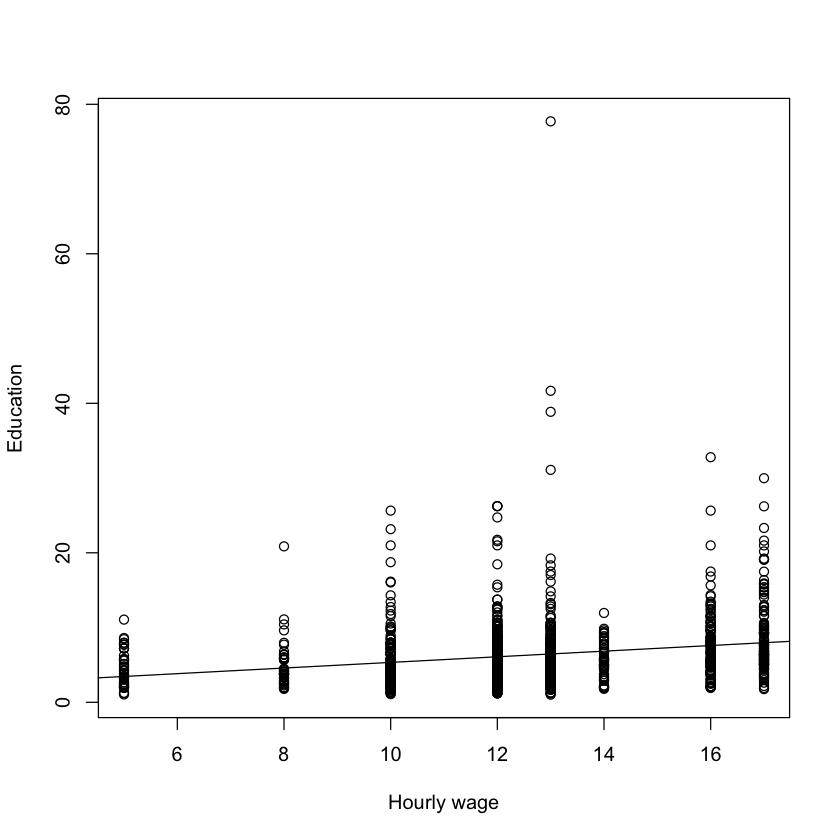

In [20]:
plot(beauty$educ, beauty$wage, xlab = "Hourly wage", ylab = "Education")
abline(reg)

---
## 2. Database Manipuation
* filter( data, condition )
* arrange( data, var1, var2 )
* select( data, var_list )
* rename( data, new_name = old_name )
* group_by( data, var_list ) and summarize( data, new_var = f(old_var) )

In [5]:
head(beauty)

wage,exper,female,looks,educ
5.73,30,1,4,14
4.28,28,1,3,12
7.96,35,1,4,10
11.57,38,0,3,16
11.42,27,0,3,16
3.91,20,1,3,12


In [16]:
filter(beauty, female == 1)[1:10, ]
# beauty <- filter(beauty, female == 1)

wage,exper,female,looks,educ
5.73,30,1,4,14
4.28,28,1,3,12
7.96,35,1,4,10
3.91,20,1,3,12
5.00,5,1,3,16
3.89,12,1,3,12
3.45,3,1,4,12
10.44,10,1,4,17
7.69,7,1,3,16
4.95,20,1,3,14


In [15]:
arrange(beauty, looks, educ)[1:10, ]

wage,exper,female,looks,educ
2.31,35,0,1,5
3.46,26,1,1,5
1.26,32,1,1,5
2.25,12,1,1,5
2.73,41,0,1,8
3.75,36,0,1,12
10.99,40,0,1,12
7.93,39,0,1,12
7.69,9,0,1,12
2.15,6,1,1,12


In [17]:
arrange(beauty, desc(looks), educ)[1:10, ]

wage,exper,female,looks,educ
4.49,17,0,5,10
6.11,7,1,5,12
3.92,12,0,5,12
2.51,4,1,5,12
3.81,4,0,5,12
3.95,2,1,5,12
7.96,15,0,5,12
12.66,22,0,5,12
3.61,6,0,5,12
2.07,5,1,5,12


In [19]:
select(beauty, wage, looks)[1:10, ]

wage,looks
5.73,4
4.28,3
7.96,4
11.57,3
11.42,3
3.91,3
8.76,3
7.69,4
5.00,3
3.89,3


In [30]:
rename(beauty, outlooks = looks)[1:10, ]

wage,exper,female,outlooks,educ
5.73,30,1,4,14
4.28,28,1,3,12
7.96,35,1,4,10
11.57,38,0,3,16
11.42,27,0,3,16
3.91,20,1,3,12
8.76,12,0,3,16
7.69,5,0,4,16
5.00,5,1,3,16
3.89,12,1,3,12


In [32]:
mutate(beauty, lwage = log(wage))[1:10, ]

wage,exper,female,looks,educ,lwage
5.73,30,1,4,14,1.745716
4.28,28,1,3,12,1.453953
7.96,35,1,4,10,2.074429
11.57,38,0,3,16,2.448416
11.42,27,0,3,16,2.435366
3.91,20,1,3,12,1.363537
8.76,12,0,3,16,2.170196
7.69,5,0,4,16,2.039921
5.00,5,1,3,16,1.609438
3.89,12,1,3,12,1.358409


In [40]:
beauty <- group_by(beauty, looks)
summarize(beauty, ave_educ = mean(educ), ave_wage = mean(wage), N = n())

looks,ave_educ,ave_wage,N
1,10.00000,4.621538,13
2,12.10563,5.328803,142
3,12.42105,6.504598,722
4,13.07418,6.299341,364
5,13.36842,7.388421,19


In [42]:
beauty <- ungroup(beauty)
summarize(beauty, ave_educ = mean(educ), ave_wage = mean(wage), N = n())

ave_educ,ave_wage,N
12.56349,6.30669,1260


---
## 3. Self-practice
* Use the dataset "beauty.csv" to:
    * create a variable "looks_wage", which is the mean of wage grouping by variable looks.
    * create a dummy variable "abv_avg", which = 1 if looks >= 4, otherwise = 0.
    * drop the observations whose ln(wage) < 1.

In [68]:
# create a variable "looks_wage", which is the mean of wage grouping by variable looks.

wage,exper,female,looks,educ,looks_wage
8.35,41,0,1,16,4.621538
3.75,36,0,1,12,4.621538
10.99,40,0,1,12,4.621538
1.65,24,1,1,13,4.621538
7.93,39,0,1,12,4.621538
5.56,10,0,1,13,4.621538
7.69,9,0,1,12,4.621538
2.73,41,0,1,8,4.621538
2.31,35,0,1,5,4.621538
3.46,26,1,1,5,4.621538


In [69]:
# create a dummy variable "abv_avg", which = 1 if looks >= 4, otherwise = 0.

wage,exper,female,looks,educ,looks_wage,abv_avg
8.35,41,0,1,16,4.621538,0
3.75,36,0,1,12,4.621538,0
10.99,40,0,1,12,4.621538,0
1.65,24,1,1,13,4.621538,0
7.93,39,0,1,12,4.621538,0
5.56,10,0,1,13,4.621538,0


wage,exper,female,looks,educ,looks_wage,abv_avg
7.96,15,0,5,12,7.388421,1
12.66,22,0,5,12,7.388421,1
4.81,6,0,5,16,7.388421,1
3.61,6,0,5,12,7.388421,1
4.49,17,0,5,10,7.388421,1
2.07,5,1,5,12,7.388421,1


In [72]:
# summary(beauty$lwage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0198  1.3104  1.6677  1.6588  2.0406  4.3531 

In [73]:
# drop the observations whose ln(wage) < 1.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.004   1.452   1.756   1.815   2.088   4.353 